In [ ]:
# Original de profesor Miguel Carrasco, UAI, REcon. de patrones de imágenes, Clase 7
# Ligeramente editado por Diego Sandoval R. para la entrega de la Tarea 3

from skimage.feature import greycomatrix, greycoprops
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import preprocessing
from math import radians
from skimage.io import imread_collection
import pandas as pd

#cargamos las imágenes de la carpeta indicada
col = imread_collection('texturas/textura_*.*')


#submuestreo de 0->14 (15 niveles)
new_scale = (0, 14)
level = 15 #numero de niveles de la imagen 
lista_descriptores = ['contrast', 'dissimilarity','homogeneity', 'ASM', 'energy', 'correlation']


F = []
ntrpM = []

#recorremos cada archivo
for filename in col.files:

    #leemos cada archivo
    image = cv2.imread(filename, 0)

    #submuestreamos cada imagen
    imagen_2 = preprocessing.MinMaxScaler(new_scale).fit_transform(image).astype('int')

    mrg = np.histogramdd(np.ravel(image), bins = 256)[0]/image.size
    mrg = list(filter(lambda p: p > 0, np.ravel(mrg)))
    #entropia
    ntrp = -np.sum(np.multiply(mrg, np.log(mrg)))
    
    ntrpM.append(ntrp)

    #calculamos la matriz de co-ocurrencia (Haralick)
    P = greycomatrix(imagen_2, distances=[1], angles=[radians(0)], levels=level, symmetric=False, normed=False)
    
    #creamos una matriz para guardar los datos
    features = []
    
    for descriptor in lista_descriptores:
        res = np.squeeze(greycoprops(P,descriptor))
        #agregamos cada descriptor a una lista
        features.append(res.round(5))
        #print(f'{descriptor}: {res:.4f}')
        
    F.append(features)

#agregamos los datos a un dataframe
# >> las columnas son los descriptores,
# >> las filas son los nombres de los archivos
df = pd.DataFrame(F, columns=lista_descriptores, index=col.files)
df = df.assign(entropy=ntrpM)

print(df)

# Sanity check
#print(ntrpM)

In [ ]:
#loop para hacer un scatter de cada columna con cada columna
for column in df:
    df.plot.scatter(x = column, y = 'contrast')
    df.plot.scatter(x = column, y = 'dissimilarity')
    df.plot.scatter(x = column, y = 'homogeneity')
    df.plot.scatter(x = column, y = 'energy')
    df.plot.scatter(x = column, y = 'correlation')
    df.plot.scatter(x = column, y = 'entropy')

<AxesSubplot: xlabel='homogeneity', ylabel='correlation'>

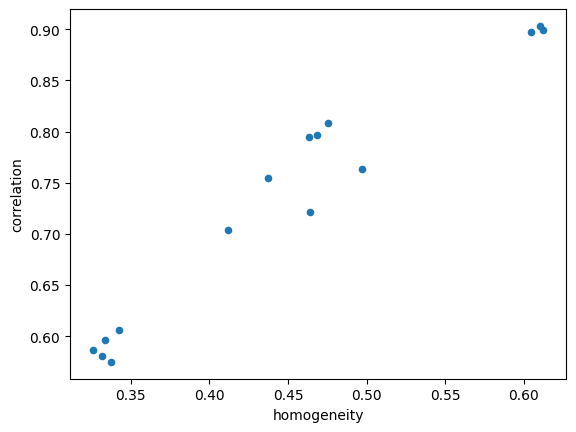

In [27]:
# Combinacion que separa las texturas mejor a mi opinion es
# la relacion entre la homogeneidad y la correlacion entre las 
# imagenes

df.plot.scatter(x = 'homogeneity', y = 'correlation')